In [443]:
import numpy as np
import matplotlib.pyplot as plt
import math
import plotly.graph_objects as gr
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import axes3d
from sympy import *
from ipywidgets import interact, interact_manual
from matplotlib.widgets import Slider, Button

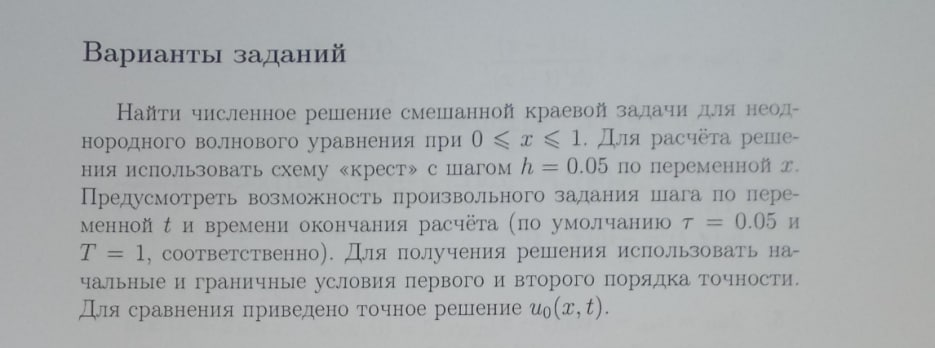

### Решение волнового уравнения 2 порядка в ч.п.

$u_{tt}=a^2u_{xx}+f(x,t)$ <br/>
$u(x, 0)=\phi_1(x)$ <br/>
$u_t(x, 0)=\phi_2(x)$ <br/>
$\alpha_1u_x(0, t)+\beta_1u(0, t)=\gamma_1(t)$ <br/>
$\alpha_2u_x(l, t)+\beta_2u(l, t)=\gamma_2(t)$ <br/>

$x\in(0, l)$<br/>
$t>0$

In [444]:
# dt = float(input("Введите ширину t временной сетки:\t\t"))
# maxT = float(input("Введите максимальное значение t в задаче\t"))

dt = 0.05
maxT = 1

x0 = 0
x1 = 1
aa = 0.5
h  = 0.05
X  = np.arange(0, 1+1e-9, h)
T  = np.arange(0, maxT+1e-9,dt)


A1 = 1
B1 = 3
C1 = lambda t: (7 + t) / 2

A2 = -2
B2 = 1
C2 = lambda t: 1 / (2 + t)**0.5


# print(f"Массив x: {X}")
# print(f"Массив t: {T}")

In [445]:
aa = 0.5

A1 = 1
B1 = 0
C1 = lambda t: -t/2

A2 = 1
B2 = 1
C2 = lambda t: 3 + np.arccos(t/2) - t / np.sqrt(4 - t*t)

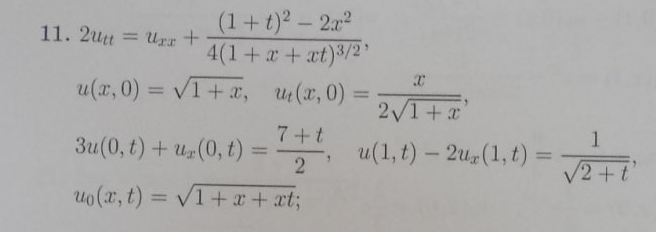

In [446]:
def solution(x, t):
  return (1 + x + x*t)**0.5

def f(x, t):
  return ((1 + t)**2 - 2*x*x) / 8 / (1 + x + x*t)**(3/2)

def ph1(x):
  return (1 + x)**0.5

def ph2(x):
  return x / 2 / (1 + x)**0.5

def ph1d2(x):
    y = Symbol('x')
    func = ph1(y)

    func = func.diff().diff()
    func = lambdify(y, func, 'numpy')

    return func(x)

In [447]:
def solution(x, t):
  return x*x + np.arccos(x * t / 2)

def f(x, t):
  return -1 + x * t * (t*t - 2*x*x) / np.power(4 - x*x*t*t, 3/2) / 2

def ph1(x):
  return x*x + np.pi/2

def ph2(x):
  return -x/2

def ph1d2(x):
    y = Symbol('x')
    func = ph1(y)

    func = func.diff().diff()
    func = lambdify(y, func, 'numpy')

    return func(x)

$\alpha_1u_x(0, t) + \beta_1u(0, t)=\gamma_1(t)$ <br/>
$\alpha_2u_x(0, t) + \beta_2u(0, t)=\gamma_2(t)$ <br/><br/>

$\alpha_1\frac{u_{1}^n-u_{0}^n}{h} + \beta_1u_0^n=\gamma_1(t^n)$<br/>
$\alpha_2\frac{u_{N}^n-u_{N-1}^{n}}{h} + \beta_2u_N^n=\gamma_2(t^n)$
<br/><br/>

$u_{1}^n\frac{\alpha_1}{h}+u_0^n(\beta_1-\frac{\alpha_1}{h})=\gamma_1(t^n)$<br/>
$u_{N}^n(\frac{\alpha_2}{h}+\beta_2)-u_{N-1}^n(\frac{\alpha_2}{h})=\gamma_2(t^n)$ <br/><br/>

$u_{1}^n\frac{\alpha_1}{h}=u_0^n(\frac{\alpha_1}{h}-\beta_1)+\gamma_1(t^n)$<br/>
$u_{N}^n(\frac{\alpha_2}{h}+\beta_2)=u_{N-1}^n(\frac{\alpha_2}{h})+\gamma_2(t^n)$ <br/><br/>

$\alpha_1u_{1}^n=u_0^n(\alpha_1-h\beta_1)+h\gamma_1(t^n)$<br/>
$u_{N}^n=u_{N-1}^n\frac{\frac{\alpha_2}{h}}{(\beta_2+\frac{\alpha_2}{h})}+\frac{\gamma_2(t^n)}{\alpha_2(\beta_2+\frac{\alpha_2}{h})}$<br/>
<br/>
$u_{0}^n=\frac{\alpha_1u_1^n}{\alpha_1-h\beta_1}-\frac{h\gamma_1(t^n)}{\alpha_1-h\beta_1}=\frac{\alpha_1u_{1}^n-h\gamma_1(t^n)}{\alpha_1-h\beta_1}$<br/>
$u_{N}^n=\frac{\alpha_2u_{N-1}^n}{\alpha_2+h\beta_2}+\frac{h\gamma_2(t^n)}{\alpha_2+h\beta_2}=\frac{\alpha_2u_{N-1}^n+h\gamma_2(t^n)}{\alpha_2+h\beta_2}$<br/>

In [448]:
def solver_h(X=X, T=T, h=h, dt=dt):
  u = np.zeros(shape=(len(T), len(X))) 

  u[0] = [ph1(x) for x in X]
  u[1] = [ph1(x) + dt * ph2(x) for x in X]

  for n in range(1, len(T) - 1):
    for k in range(1, len(X) - 1):
      u[n + 1][k] = (aa * dt * dt / h / h) * (u[n][k+1] - 2  * u[n][k] + u[n][k-1]) + dt * dt * f(X[k], T[n]) + 2 * u[n][k] - u[n-1][k]
    u[n+1][ 0] = (A1*u[n+1][ 1] - h*C1(T[n+1])) / (A1 - h*B1)
    u[n+1][-1] = (A2*u[n+1][-2] + h*C2(T[n+1])) / (A2 + h*B2)
    
  return u

In [449]:
def solver_h_2D(m=2, X=X, T=T, h=h, dt=dt):
  u = np.zeros(shape=(m, len(X))) 

  u[0] = [ph1(x) for x in X]
  u[1] = [ph1(x) + dt * ph2(x) for x in X]

  for n in range(1, m - 1):
    for k in range(1, len(X) - 1):
      u[n + 1][k] = (aa * dt * dt / h / h) * (u[n][k+1] - 2  * u[n][k] + u[n][k-1]) + dt * dt * f(X[k], T[n]) + 2 * u[n][k] - u[n-1][k]
    u[n+1][ 0] = (A1*u[n+1][ 1] - h*C1(T[n+1])) / (A1 - h*B1)
    u[n+1][-1] = (A2*u[n+1][-2] + h*C2(T[n+1])) / (A2 + h*B2)
    
  return u

def plot_2D(m=1):

    global X
    global T

    plt.clf()
    fig = plt.gcf()
    fig.set_size_inches(8, 6)
    ax = plt.gca()
    ax.set_xlim([-h, 1+h])
    uu = solver_h(X=X, T=T)
    ax.set_ylim([-2, 3])
    
    u = solver_h_2D(m=m)
    # print(u)
    real_u = [solution(x, T[m-1]) for x in X]

    plt.plot(X, u[-1], label="Numerical Solution")
    plt.plot(X, real_u, label="Real Solution")

    plt.grid(True)
    plt.legend()
    try:
        plt.savefig(f"./graphs/t ={T[m-1]: .2f}.jpg")
    except Exception:
        print("An error occured while saving graph to /graph directory. Check if it's created.")
        
    plt.show() 

In [450]:
interact(plot_2D, m=(2, len(T), 1))

interactive(children=(IntSlider(value=2, description='m', max=21, min=2), Output()), _dom_classes=('widget-int…

<function __main__.plot_2D(m=1)>

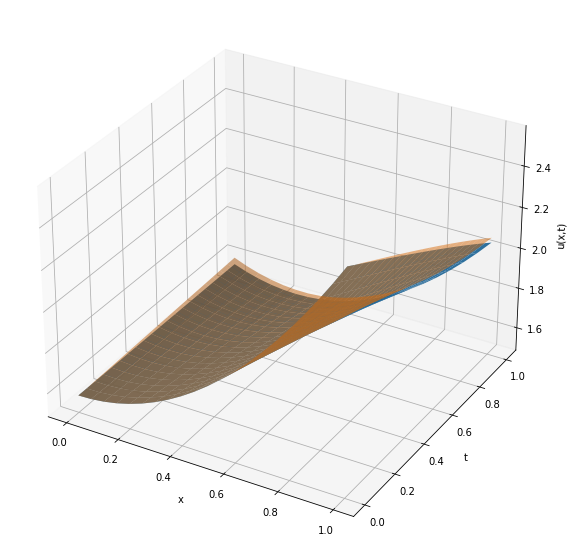

In [451]:
%matplotlib inline
def plot_u(X=X, T=T):
  fig = plt.figure(figsize=(10, 10))
  ax = fig.add_subplot(projection='3d')

  Xs, Ts = np.meshgrid(X, T)
  u = solver_h()

  ax.set_xlabel('x')
  ax.set_ylabel('t')
  ax.set_zlabel('u(x,t)')
  
  ax.plot_surface(Xs, Ts, solution(Xs, Ts), alpha=0.9, label="Real")
  ax.plot_surface(Xs, Ts, u, alpha=0.5, label="Calc")

plot_u()

In [452]:
def plot_u_with_plotly(X=X, T=T, u=solver_h()):
  Xs, Ts = np.meshgrid(X, T)
  fig = gr.Figure(data=[gr.Surface(z=u, x=Xs, y=Ts)])
  fig.update_layout(scene = dict(
                      xaxis_title='x',
                      yaxis_title='t',
                      zaxis_title='u(x,t)'),
                      width=700,
                      margin=dict(r=20, b=10, l=10, t=10))
  fig.show()

# plot_u_with_plotly()

In [453]:
Xs, Ts = np.meshgrid(X, T)
# plot_u_with_plotly(u=(solution(Xs, Ts)))

In [454]:
def solver_hh(X=X, T=T, h=h, dt=dt):
  uu = np.zeros(shape=(len(T), len(X))) 

  uu[0] = [ph1(x) for x in X]
  uu[1] = [ph1(x) + dt * ph2(x) + dt * dt / 2 * (aa * ph1d2(x) + f(x, 0)) for x in X]

  # print(u.shape)
  for n in range(1, len(T) - 1):
    for k in range(1, len(X) - 1):
      uu[n + 1][k] = aa * dt * dt / h / h * (uu[n][k+1] - 2  * uu[n][k] + uu[n][k-1]) + dt * dt * f(X[k], T[n]) + 2 * uu[n][k] - uu[n-1][k]
    uu[n+1][ 0] = (1 / (2 * h * B1 - 3 * A1)) * ( A1 * uu[n+1][ 2] - 4 * A1 * uu[n+1][ 1] + 2 * h * C1(T[n+1]))
    uu[n+1][-1] = (1 / (2 * h * B2 + 3 * A2)) * (-A2 * uu[n+1][-3] + 4 * A2 * uu[n+1][-2] + 2 * h * C2(T[n+1]))
  return uu

In [455]:
# %matplotlib inline
# fig = plt.figure(figsize=(10, 10))
# ax = fig.add_subplot(projection='3d')

# Xs, Ts = np.meshgrid(X, T)
# uu = solver_hh()

# ax.set_xlabel('x')
# ax.set_ylabel('t')
# ax.set_zlabel('u(x,t)')
# ax.plot_surface(Xs, Ts, solution(Xs, Ts), alpha=0.9, label="Real")
# ax.plot_surface(Xs, Ts, uu, alpha=0.5, label="Calc")

In [456]:
fig = gr.Figure(data=[gr.Surface(z=(solution(Xs, Ts) - solver_h()), x=Xs, y=Ts)])
fig.update_layout(scene = dict(
                    xaxis_title='x',
                    yaxis_title='t',
                    zaxis_title='u(x,t)'),
                    width=700,
                    margin=dict(r=20, b=10, l=10, t=10))
# fig.show()
print(np.max(np.abs(solution(Xs, Ts) - solver_h())))

0.03394789035039425


In [457]:
fig = gr.Figure(data=[gr.Surface(z=(solution(Xs, Ts) - solver_hh()), x=Xs, y=Ts)])
fig.update_layout(scene = dict(
                    xaxis_title='x',
                    yaxis_title='t',
                    zaxis_title='u(x,t)'),
                    width=700,
                    margin=dict(r=20, b=10, l=10, t=10))
# fig.show()
print(np.max(np.abs(solution(Xs, Ts) - solver_hh())))

2.33347834228681e-05


Простенькая задачка. Струна, правый конец закреплен, левый смещают по закону (sin(pi*t))^2 * heaviside(pi - t). По сути левый конец дергают один раз. Показать отражение волны от закрепленного (правого) конца струны.

In [458]:
aa = 1

def tetta(x):
    return 1*(x>=0)

A1 = 0
B1 = 1
C1 = lambda t: np.sin(np.pi * t)**2 * tetta(1 - t)

A2 = 0
B2 = 1
C2 = lambda t: 0

def solution(x, t):
  return 0

def f(x, t):
  return 0

def ph1(x):
  return 0

def ph2(x):
  return 0

def ph1d2(x):
    return 0

In [459]:
interact(plot_2D, m=(2, len(T), 1))

interactive(children=(IntSlider(value=2, description='m', max=21, min=2), Output()), _dom_classes=('widget-int…

<function __main__.plot_2D(m=1)>

In [460]:
from IPython.display import display, clear_output
from matplotlib.animation import FuncAnimation

def plot_2D_auto():

    global X
    global T

    m = len(T)
    fig, ax = plt.subplots(figsize=(8,6))
    ax.grid(True)
    p, = ax.plot(0, 0)
    plt.axis([-h, 1+h, -2, 2])
    # Animation Function

    def animate_plot(i):
        u = solver_h_2D(m=i+2)
        p.set_data(X, u[-1])
        return p,

    ani = FuncAnimation(fig,
                        animate_plot,
                        frames=len(T)-3,
                        interval=100)

    ani.save('animation.gif', fps=240)

In [461]:
# plot_2D_auto()